# Introduction to optimization

## Basic Polynomial Fucntion + Optimization(Local)

The basic components

* The objective function (also called the 'cost' function)

In [44]:
import numpy as np
objective = np.poly1d([1,0,-2,0,0])  #Create Polynmoial FUnction
print(objective)

   4     2
1 x - 2 x


* The "optimizer"

<p style="border-radius: 30px;
          border:2px; 
          border-style:solid; 
          border-color:#000000;
          padding: 2em;
          box-shadow: 5px 10px;
          text-align: justify;
          background-color:lightgreen;">
<b>Local Optimizer</b> 

</p>

In [45]:
import scipy.optimize as opt

``` python
opt.fmin(Objective Function , Initial Guess  )
```

In [46]:
x_ = opt.fmin(objective, [-3])
print("solved: x={}".format(x_))

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 18
         Function evaluations: 37
solved: x=[-0.99997559]


In [47]:
%matplotlib notebook
import matplotlib.pylab as mpl

<IPython.core.display.Javascript object>


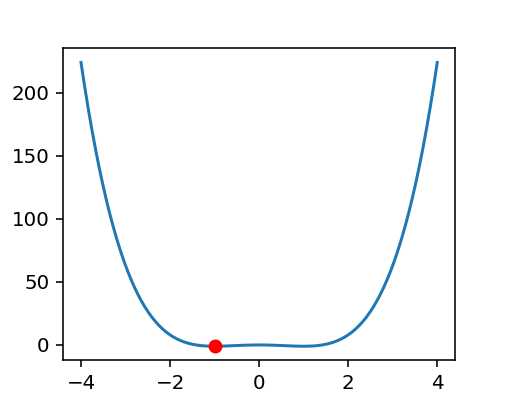

In [48]:
x = np.linspace(-4,4,101)
mpl.plot(x, objective(x))
mpl.plot(x_, objective(x_), 'ro')

## Adding Constarints (Box Constaints)

Additional components

* "Box" constraints (Inputs are valid only in this range)

In [23]:
import scipy.special as ss
import scipy.optimize as opt
import numpy as np
import matplotlib.pylab as mpl

<IPython.core.display.Javascript object>


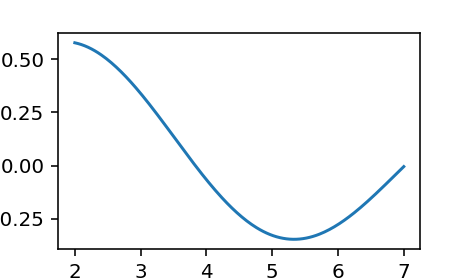

In [24]:
x = np.linspace(2, 7, 200)
j1x = ss.j1(x)  # 1st order Bessel
mpl.plot(x, j1x)

<IPython.core.display.Javascript object>


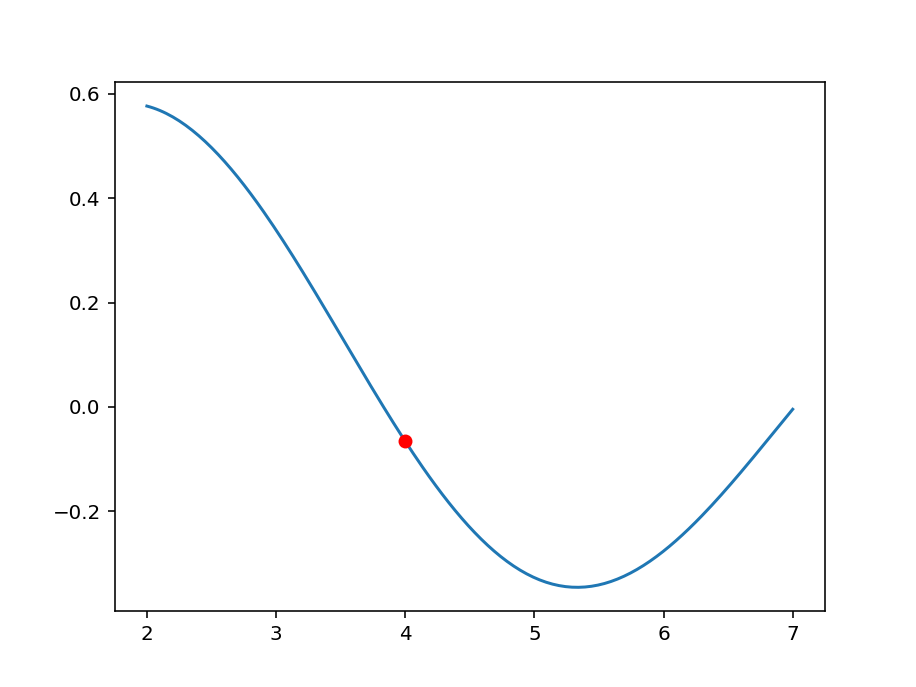

In [31]:
# use scipy.optimize's more modern "results object" interface
result = opt.minimize_scalar(ss.j1, 
                             method="bounded",   #Box Constaraint Optimization
                             bounds=[2, 4])

j1_min = ss.j1(result.x)
mpl.plot(x, j1x)
mpl.plot(result.x, j1_min,'ro')

## Gradient and/or Hessian + Constarined Optimization

* The gradient and/or hessian

In [50]:
import mystic.models as models  ### For Non-Linear Test Functions

In [51]:
##Example
print(models.rosen.__doc__)

evaluates an N-dimensional Rosenbrock saddle for a list of coeffs

f(x) = \sum_(i=0)^(N-2) 100*(x_(i+1) - x_(i)^(2))^(2) + (1 - x_(i))^(2)

Inspect with mystic_model_plotter using::
    mystic.models.rosen -b "-3:3:.1, -1:5:.1, 1" -d -x 1

The minimum is f(x)=0.0 at x_i=1.0 for all i


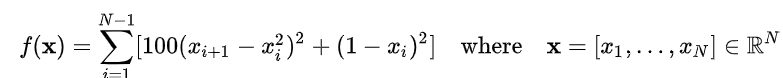

<b> NOTE ::</b> 
- mystic.models.rosen -b "-3:3:.1, -1:5:.1, 1" -d -x 1
- Plot Between ranges [-3,3 , Granularity] and [-1,5] , Third Dimension  = 1
- The minimum is f(x)=0.0 at x_i=1.0 for all i , i.e (1,1)

<b> Rosenbrock saddle:: </b>

<IPython.core.display.Javascript object>


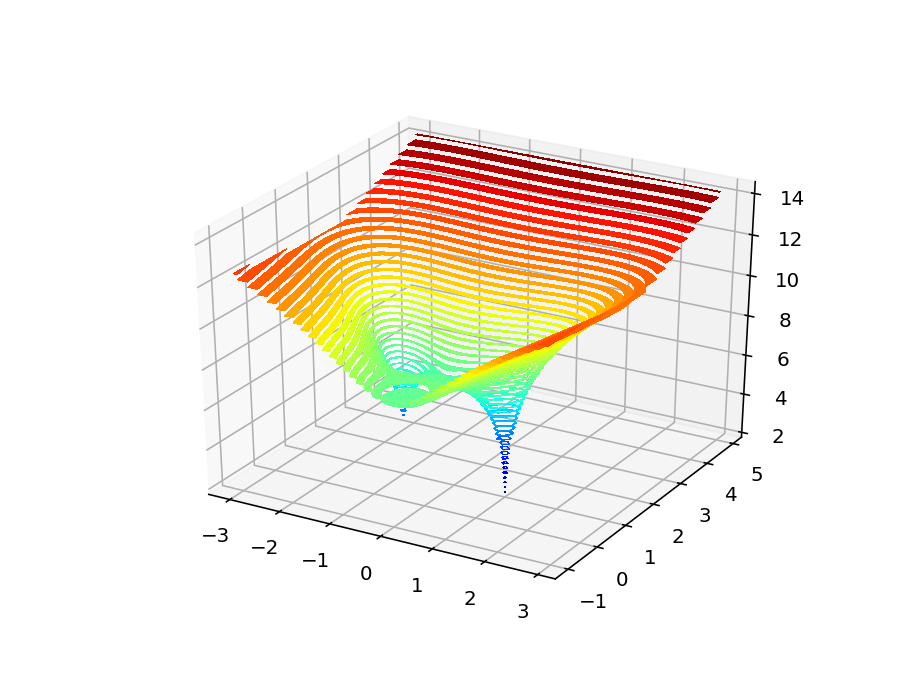

In [117]:
import mystic
mystic.model_plotter(mystic.models.rosen, kwds='-f -d -x 1 -b "-3:3:.1, -1:5:.1, 1"')

In [94]:
import scipy.optimize as opt
import numpy as np

In [95]:
#Optimal SOlution fo rthe 5-D Rossenbrocvk Equation
opt.rosen([1,1,1,1,1])

0.0

In [96]:
# initial guess
x0 = [1.3, 1.6, -0.5, -1.8, 0.8]  ### 5-D Rossenbrock

result = opt.minimize(opt.rosen, x0)
print(result.x)

[-0.9620501   0.93573761  0.88071026  0.77787182  0.60508459]


In [97]:
# number of function evaluations
print(result.nfev)

378


In [98]:
# again, but this time provide the derivative
##May do Better is derivative is provided
result = opt.minimize(opt.rosen, x0, jac=opt.rosen_der)  
##jac =  should be a function that returns the gradient vector
print(result.x)

[-0.96205103  0.9357394   0.88071361  0.77787768  0.60509369]


In [99]:
# number of function evaluations and derivative evaluations
print(result.nfev)
print('*******')
print(result.njev)

54
*******
54


<div class="alert alert-block alert-danger">
<b>Optimizer can Lead to  A Local Minima , thus use multilple initial guesses and comapre</b> 
</ul>
</div>

In [104]:
# however, note for a different x0...
for i in range(5):
    x0 = np.random.randint(-20,20,5)  #array of 5 integers
    result = opt.minimize(opt.rosen, x0, jac=opt.rosen_der)
    print("{} @ {} evals".format(result.x, result.nfev))

[-0.96205103  0.9357394   0.88071362  0.77787771  0.60509373] @ 88 evals
[1. 1. 1. 1. 1.] @ 90 evals
[1.         1.00000001 1.00000002 1.00000003 1.00000005] @ 84 evals
[1.         1.         1.         0.99999999 0.99999999] @ 128 evals
[-0.962051    0.93573937  0.88071354  0.77787756  0.60509347] @ 152 evals


* The penalty functions

$\psi(x) = f(x) + k*p(x)$

$ f(x)$ = Cost Function <br>
$p(x)$ = Penalty Function

Whenever Penalty Function is violated, it acts as a barrier and lifts up the surface to prevent optimizer hitting that particular minima

In [105]:
# http://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#tutorial-sqlsp
'''
  Maximize: f(x) = 2*x0*x1 + 2*x0 - x0**2 - 2*x1**2
  
  Subject to:    x0**3 - x1 == 0
                         x1 >= 1
'''

'\n  Maximize: f(x) = 2*x0*x1 + 2*x0 - x0**2 - 2*x1**2\n  \n  Subject to:    x0**3 - x1 == 0\n                         x1 >= 1\n'

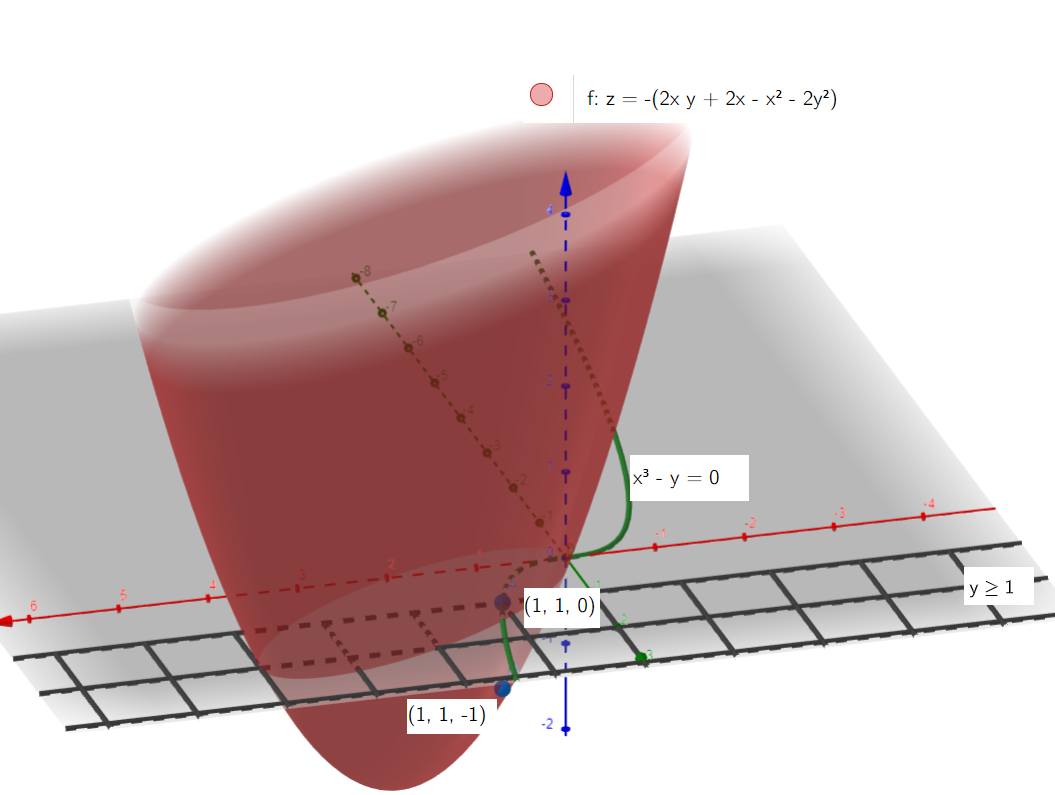

In [109]:
def objective(x, sign=1.0):  #sign = +1 / -1
    return sign*(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2)

def derivative(x, sign=1.0):
    dfdx0 = sign*(-2*x[0] + 2*x[1] + 2)
    dfdx1 = sign*(2*x[0] - 4*x[1])
    return np.array([ dfdx0, dfdx1 ])

In [114]:
#example
objective([1,1])

1.0

In [112]:
# unconstrained
result = opt.minimize(objective,  #Objective Function
                      [-1.0,1.0],  #Initial Guess
                      args=(-1.0,), #Extra arguments passed to the objective function and its derivatives
                      jac=derivative,   #Derivative Function
                      method='SLSQP',   #Linear & Quad. Programming (Only works on Simple Linear and Quad Function)
                      options={'disp': True})  #A dictionary of solver options.#Set to True to print convergence messages.

print("unconstrained: {}".format(result.x))

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -2.0
            Iterations: 4
            Function evaluations: 5
            Gradient evaluations: 4
unconstrained: [2. 1.]


<div class="alert alert-block alert-danger">
<b>Setting up Constraints::</b> 
</ul>
</div>

In [ ]:
'''
  Maximize: f(x) = 2*x0*x1 + 2*x0 - x0**2 - 2*x1**2
  
  Subject to:    x0**3 - x1 == 0
                         x1 >= 1
'''

In [ ]:
def objective(x, sign=1.0):  #sign = +1 / -1
    return sign*(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2)

def derivative(x, sign=1.0):
    dfdx0 = sign*(-2*x[0] + 2*x[1] + 2)
    dfdx1 = sign*(2*x[0] - 4*x[1])
    return np.array([ dfdx0, dfdx1 ])

In [151]:
cons = ({'type': 'eq',  #Equaltiy Constraint
         'fun' : lambda x: np.array([x[0]**3 - x[1]]),
         'jac' : lambda x: np.array([3.0*(x[0]**2.0), -1.0])},
        {'type': 'ineq',  #In-Equaltiy Constraint
         'fun' : lambda x: np.array([x[1] - 1]),  ##FORMAT = put everything in L.H.S >= 0
         'jac' : lambda x: np.array([0.0, 1.0])})  ##w.r.t.  x[0] , x[1]

# constrained
result = opt.minimize(objective, 
                      [-1.0,1.0], 
                      args=(-1.0,), 
                      jac=derivative,
                      constraints=cons, 
                      method='SLSQP', 
                      options={'disp': True})

print("constrained: {}".format(result.x))

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1.0000001831052137
            Iterations: 9
            Function evaluations: 14
            Gradient evaluations: 9
constrained: [1.00000009 1.        ]


Optimizer classifications

* Constrained versus unconstrained (and importantly LP and QP)

# scipy.optimize.minimize documentation


<b> Constrained vs Unconstarined Optimization </b>

   **Unconstrained minimization**
    
    Method  *Nelder-Mead*  uses the Simplex algorithm [1]_, [2]_. This
    algorithm has been successful in many applications but other algorithms
    using the first and/or second derivatives information might be preferred
    for their better performances and robustness in general.
    
    Method *Powell* is a modification of Powell's method [3]_, [4]_ which
    is a conjugate direction method. It performs sequential one-dimensional
    minimizations along each vector of the directions set (`direc` field in
    `options` and `info`), which is updated at each iteration of the main
    minimization loop. The function need not be differentiable, and no
    derivatives are taken.
    
    Method *CG* uses a nonlinear conjugate gradient algorithm by Polak and
    Ribiere, a variant of the Fletcher-Reeves method described in [5]_ pp.
    120-122. Only the first derivatives are used.
    
    Method *BFGS* uses the quasi-Newton method of Broyden, Fletcher,
    Goldfarb, and Shanno (BFGS) [5]_ pp. 136. It uses the first derivatives
    only. BFGS has proven good performance even for non-smooth
    optimizations. This method also returns an approximation of the Hessian
    inverse, stored as `hess_inv` in the OptimizeResult object.
    
    Method *Newton-CG* uses a Newton-CG algorithm [5]_ pp. 168 (also known
    as the truncated Newton method). It uses a CG method to the compute the
    search direction. See also *TNC* method for a box-constrained
    minimization with a similar algorithm.
    
    Method *Anneal* uses simulated annealing, which is a probabilistic
    metaheuristic algorithm for global optimization. It uses no derivative
    information from the function being optimized.
    
    Method *dogleg* uses the dog-leg trust-region algorithm [5]_
    for unconstrained minimization. This algorithm requires the gradient
    and Hessian; furthermore the Hessian is required to be positive definite.
    
    Method *trust-ncg* uses the Newton conjugate gradient trust-region
    algorithm [5]_ for unconstrained minimization. This algorithm requires
    the gradient and either the Hessian or a function that computes the
    product of the Hessian with a given vector.

   

<b>  Constrained minimization </b>

- Constrained minimization mostly uses LP and QP

    
    Method *L-BFGS-B* uses the L-BFGS-B algorithm [6]_, [7]_ for bound
    constrained minimization.
    
    Method *TNC* uses a truncated Newton algorithm [5]_, [8]_ to minimize a
    function with variables subject to bounds. This algorithm uses
    gradient information; it is also called Newton Conjugate-Gradient. It
    differs from the *Newton-CG* method described above as it wraps a C
    implementation and allows each variable to be given upper and lower
    bounds.
    
    Method *COBYLA* uses the Constrained Optimization BY Linear
    Approximation (COBYLA) method [9]_, [10]_, [11]_. The algorithm is
    based on linear approximations to the objective function and each
    constraint. The method wraps a FORTRAN implementation of the algorithm.
    
    Method *SLSQP* uses Sequential Least SQuares Programming to minimize a
    function of several variables with any combination of bounds, equality
    and inequality constraints. The method wraps the SLSQP Optimization
    subroutine originally implemented by Dieter Kraft [12]_. Note that the
    wrapper handles infinite values in bounds by converting them into large
    floating values.


The typical optimization algorithm (local or global) is unconstrained. Constrained algorithms tend strongly to be local, and also often use LP/QP approximations. Hence, most optimization algorithms are good either for quick linear/quadratic approximation under some constraints, or are intended for nonlinear functions without constraints.  Any information about the problem that impacts the potential solution can be seen as constraining information.  Constraining information is typically applied as a penatly, or as a box constraint on an input.  The user is thus typically forced to pick whether they want to apply constraints but treat the problem as a LP/QP approximation, or to ignore the constraining information in exchange for a nonliear solver.

In [10]:
import scipy.optimize as opt

# constrained: linear (i.e. A*x + b)
print(opt.cobyla.fmin_cobyla)
print(opt.linprog)

# constrained: quadratic programming  (i.e. up to x**2)
print(opt.fmin_slsqp)

<function fmin_cobyla at 0x10dba79d8>
<function linprog at 0x10dd1d730>
<function fmin_slsqp at 0x10dba7bf8>


# CVXOPT

- Better tools than scipy
- LP and QP

## LINEAR OBJECTIVE FUNCTION EXAMPLE 

In [154]:
import cvxopt as cvx
from cvxopt import solvers as cvx_solvers

In [ ]:
# http://cvxopt.org/examples/tutorial/lp.html
'''
minimize:  f = 2*x0 + x1

subject to:
           -x0 + x1 <= 1
            x0 + x1 >= 2
            x1 >= 0
            x0 - 2*x1 <= 4
'''

<b> Constraints Format </b> <br>
A*x = b

Format:

L.H.S <= constant 

In [161]:
#*********************#
# 4 constarints equations
A = cvx.matrix([ [-1.0, -1.0, 0.0, 1.0],  # vector of x0 ' s
                [1.0, -1.0, -1.0, -2.0] ]) # vector of x1 ' s

b = cvx.matrix([ 1.0, -2.0, 0.0, 4.0 ])  #Constants


#***********************#
# Objective Function
cost = cvx.matrix([ 2.0, 1.0 ])  #minimize:  f = 2*x0 + x1
#Coefficients of the Linear/Quad Function

In [162]:
sol = cvx_solvers.lp(cost,  A , b)

print(sol['x'])

     pcost       dcost       gap    pres   dres   k/t
 0:  2.6471e+00 -7.0588e-01  2e+01  8e-01  2e+00  1e+00
 1:  3.0726e+00  2.8437e+00  1e+00  1e-01  2e-01  3e-01
 2:  2.4891e+00  2.4808e+00  1e-01  1e-02  2e-02  5e-02
 3:  2.4999e+00  2.4998e+00  1e-03  1e-04  2e-04  5e-04
 4:  2.5000e+00  2.5000e+00  1e-05  1e-06  2e-06  5e-06
 5:  2.5000e+00  2.5000e+00  1e-07  1e-08  2e-08  5e-08
Optimal solution found.
[ 5.00e-01]
[ 1.50e+00]



## QUADRATIC OBJECTIVE FUNCTION EXAMPLE

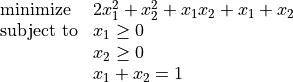

FORMAT :

  minimize    (1/2)*x'*Q*x + p'*x

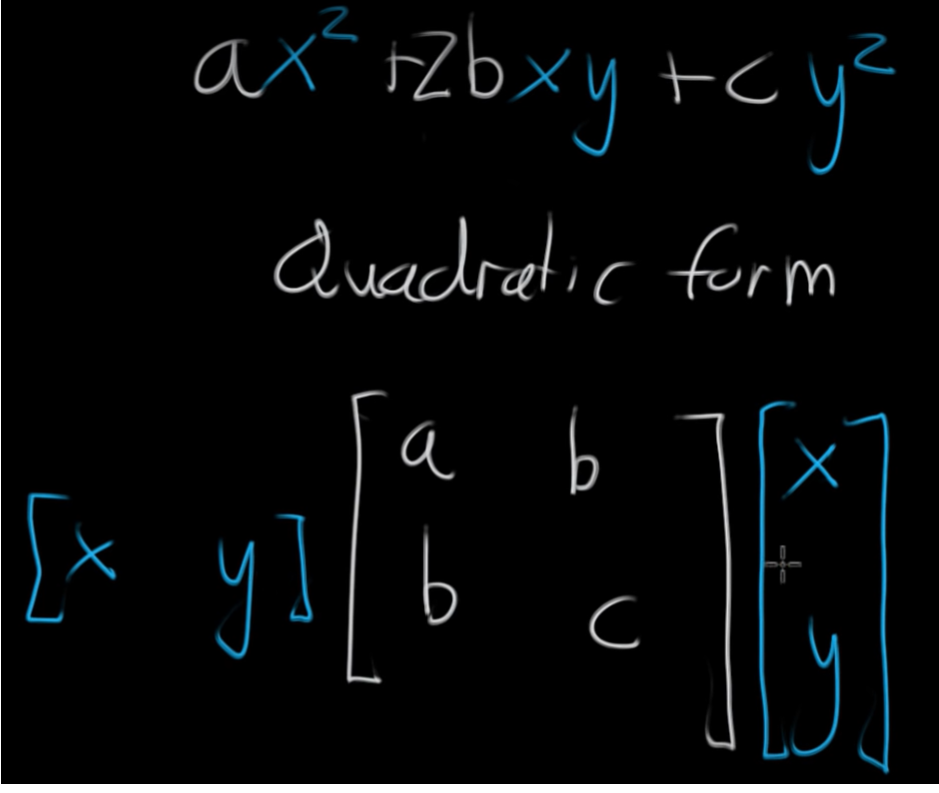

In [ ]:
# http://cvxopt.org/examples/tutorial/qp.html
'''
minimize:  f = 2*x1**2 + x2**2 + x1*x2 + x1 + x2

subject to:
            x1 >= 0
            x2 >= 0
            
            x1 + x2 == 1
'''

In [165]:
Q = 2*cvx.matrix([[2, .5], 
                   [.5, 1]])
p = cvx.matrix([1.0, 1.0])   ##Linear Part

##In-Equality COnstaints####  2 inequality constarints
G = cvx.matrix([[-1.0,0.0],
                [0.0,-1.0]])
h = cvx.matrix([0.0,0.0])

##Equality COnstaints####  # 1 equality equaiotn
A = cvx.matrix( [1.0, 1.0], 
                (1,2)  )
b = cvx.matrix(1.0)

Signature:
cvx_solvers.qp( P, q, G=None, h=None, A=None, b=None,)

    """
    Solves a quadratic program

        minimize    (1/2)*x'*P*x + q'*x
        subject to  G*x <= h
                    A*x = b.


    Input arguments.

        P is a n x n dense or sparse 'd' matrix with the lower triangular
        part of P stored in the lower triangle.  Must be positive
        semidefinite.

        q is an n x 1 dense 'd' matrix.

        G is an m x n dense or sparse 'd' matrix.

        h is an m x 1 dense 'd' matrix.

        A is a p x n dense or sparse 'd' matrix.

        b is a p x 1 dense 'd' matrix or None.

        solver is None or 'mosek'.

        The default values for G, h, A and b are empty matrices with
        zero rows.

In [169]:
sol = cvx_solvers.qp(Q, p, G, h, A, b)

print(sol['x'])

     pcost       dcost       gap    pres   dres
 0:  1.8889e+00  7.7778e-01  1e+00  3e-16  2e+00
 1:  1.8769e+00  1.8320e+00  4e-02  2e-16  6e-02
 2:  1.8750e+00  1.8739e+00  1e-03  2e-16  5e-04
 3:  1.8750e+00  1.8750e+00  1e-05  6e-17  5e-06
 4:  1.8750e+00  1.8750e+00  1e-07  2e-16  5e-08
Optimal solution found.
[ 2.50e-01]
[ 7.50e-01]



Notice how much nicer it is to see the optimizer "trajectory".  Now, instead of a single number, we have the path the optimizer took in finding the solution. `scipy.optimize` has a version of this, with `options={'retall':True}`, which returns the solver trajectory.

**EXERCISE:** Solve the constrained programming problem by any of the means above.

Minimize: f = -1*x[0] + 4*x[1]

Subject to: <br>
-3*x[0] + 1*x[1] <= 6 <br>
1*x[0] + 2*x[1] <= 4 <br>
x[1] >= -3 <br>

where:  -inf <= x[0] <= inf

# Global Optimization

* Local versus global

In [171]:
import scipy.optimize as opt
# probabilstic solvers, that use random hopping/mutations
print(opt.differential_evolution)
print(opt.basinhopping)

<function differential_evolution at 0x00000235317C04C8>
<function basinhopping at 0x0000023531778168>


In [174]:
# bounds instead of an initial guess
bounds = [(-10., 10)]*5  # each tuple for each dimensions of the 5-D Ressenlback Equation

for i in range(10):
    result = opt.differential_evolution(opt.rosen, bounds)
    # result and number of function evaluations
    print(result.x, '@ {} evals'.format(result.nfev))

[1. 1. 1. 1. 1.] @ 42081 evals
[1. 1. 1. 1. 1.] @ 44331 evals
[1. 1. 1. 1. 1.] @ 47331 evals
[1. 1. 1. 1. 1.] @ 46356 evals
[1. 1. 1. 1. 1.] @ 45381 evals
[1. 1. 1. 1. 1.] @ 45306 evals
[1. 1. 1. 1. 1.] @ 46731 evals
[1. 1. 1. 1. 1.] @ 44931 evals
[1. 1. 1. 1. 1.] @ 43131 evals
[1. 1. 1. 1. 1.] @ 45756 evals


Global optimizers tend to be much slower than local optimizers, and often use randomness to pick points within some box constraints instead of starting with an initial guess. The choice then is between algorithms that are non-deterministic and algorithms that are deterministic but depend very strongly on the selected starting point.

Local optimization algorithms have names like "gradient descent" and "steepest descent", while global optimizations tend to use things like "stocastic" and "genetic" algorithms.

* Not covered: other exotic types

# Least Squares Fitting

Other important special cases:

* Least-squares fitting

In [175]:
import scipy.optimize as opt
import scipy.stats as stats
import numpy as np

<b> Estimate " a, b, f, phi " of the function </b>

In [176]:
# Define the function to fit.
def function(x, a, b, f, phi):
    result = a * np.exp(-b * np.sin(f * x + phi))
    return result

In [178]:
# Create a noisy data set around the actual parameters
true_params = [3, 2, 1, np.pi/4]
print("target parameters: {}".format(true_params))

target parameters: [3, 2, 1, 0.7853981633974483]


In [179]:
x = np.linspace(0, 2*np.pi, 25)
exact = function(x, *true_params)
noisy = exact + 0.3*stats.norm.rvs(size=len(x))

<IPython.core.display.Javascript object>


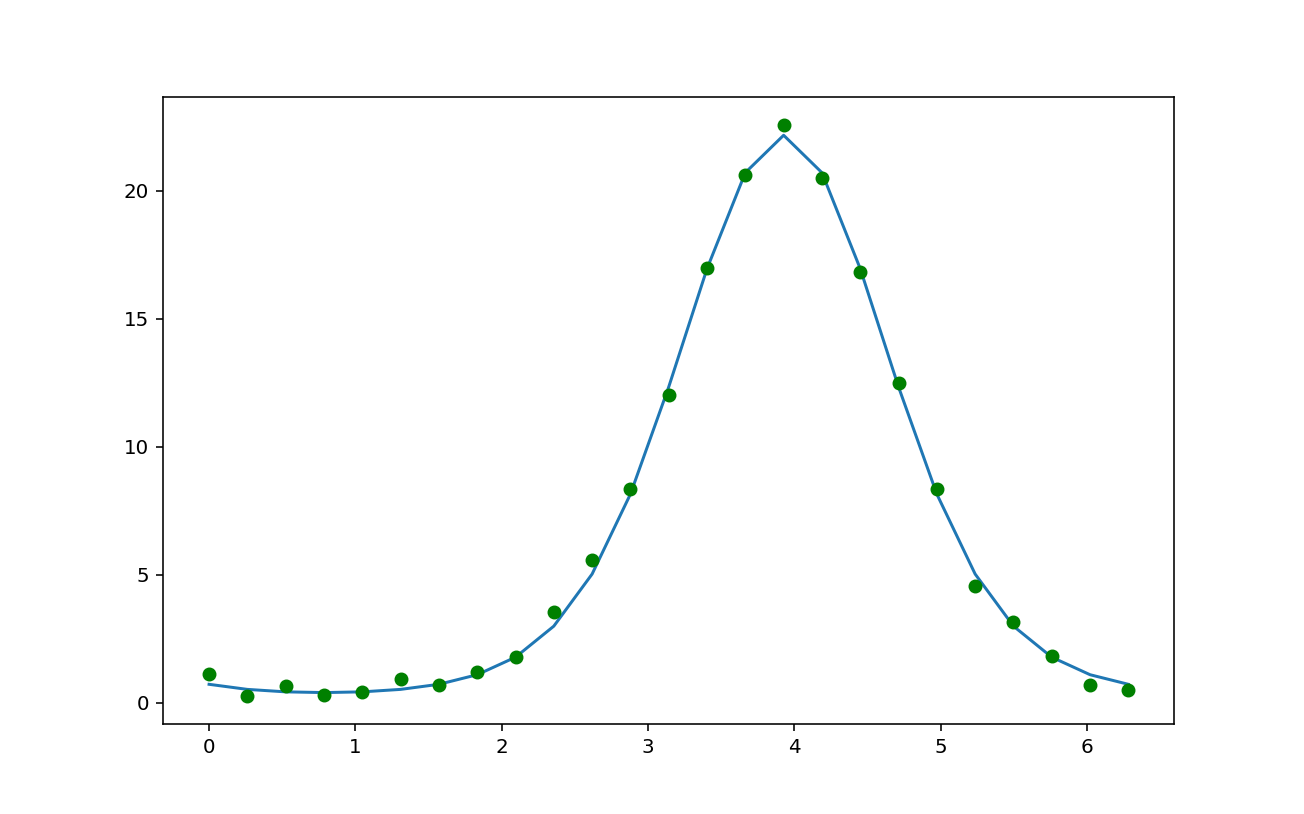

In [182]:
plt.plot(x , exact)
plt.plot(x , noisy , 'go')

In [183]:
# Use curve_fit to estimate the function parameters from the noisy data.

initial_guess = [1,1,1,1]  # For a, b, f, phi

estimated_params, err_est = opt.curve_fit(function,          #Function
                                          x,                 #x -data
                                          noisy,              #y - data
                                          p0=initial_guess)   #initial guess of function prameters

print("solved parameters: {}".format(estimated_params))

solved parameters: [3.22550325 1.92685394 1.01578975 0.72772434]


In [184]:
# err_est is an estimate of the covariance matrix of the estimates
# The estimated covariance .The diagonals provide the variance of the parameter estimate.
print("covarance: {}".format(err_est.diagonal()))

covarance: [0.04750555 0.00451562 0.00047034 0.00725102]


<IPython.core.display.Javascript object>


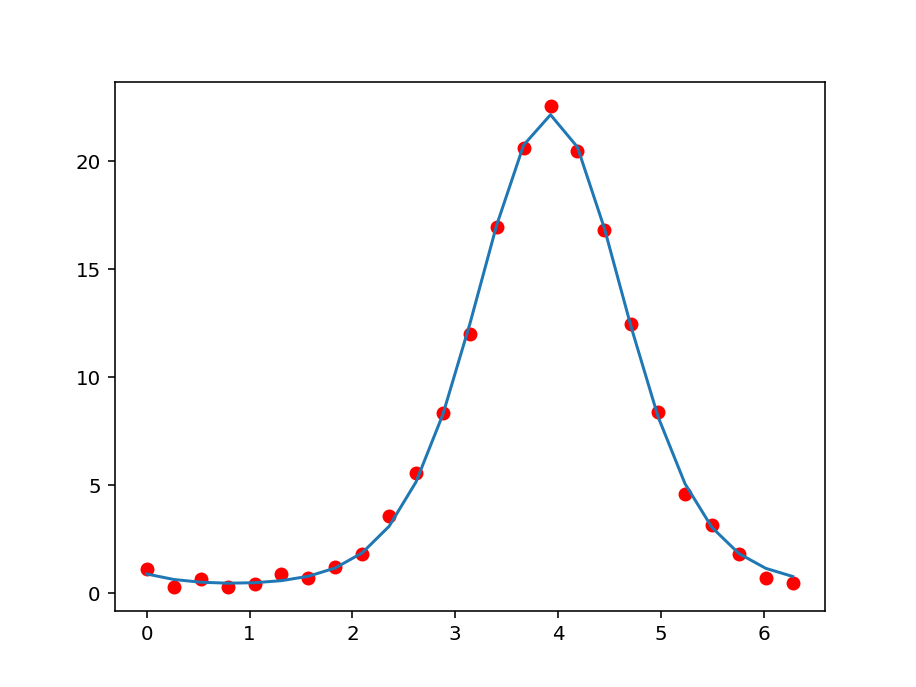

In [185]:
import matplotlib.pylab as mpl
mpl.plot(x, noisy, 'ro')
mpl.plot(x, function(x, *estimated_params)) 

<p style="border-radius: 30px;
          border:2px; 
          border-style:solid; 
          border-color:#000000;
          padding: 2em;
          box-shadow: 5px 10px;
          text-align: justify;
          background-color:lightgreen;">
<b>Least-squares tends to be chosen when the user wants a measure of the covariance, typically as an error estimate.</b> 

</p>

# Integer programming

<p style="border-radius: 30px;
          border:2px; 
          border-style:solid; 
          border-color:#000000;
          padding: 2em;
          box-shadow: 5px 10px;
          text-align: justify;
          background-color:lightgreen;">
<b>Integer programming (IP) or Mixed-integer programming (MIP) requires special optimizers that only select parameter values from the set of integers.  These optimizers are typically used for things like cryptography, or other optimizations over a discrete set of possible solutions.</b> 

</p>

# Application sof Optimization

Typical uses

* Function minimization

* Data fitting

* Root finding

In [187]:
import numpy as np
import scipy.optimize as opt

<div class="alert alert-block alert-danger">
<b>Solve the system of non-linear equations</b> 
</ul>
</div>

In [195]:
def system(x,a,b,c):
    x0, x1, x2 = x
    eqs= [   ##System of 3 Non-Linear equations
        3 * x0 - np.cos(x1*x2) + a, # == 0       (R.H.S)
        x0**2 - 81*(x1+0.1)**2 + np.sin(x2) + b, # == 0
        np.exp(-x0*x1) + 20*x2 + c # == 0
    ]
    return eqs

# coefficients
a = -0.5
b = 1.06
c = (10 * np.pi - 3.0) / 3

In [190]:
# initial guess of X- vector
x0 = [0.1, 0.1, -0.1]

# Solve the system of non-linear equations.
result = opt.root(system,
                  x0, 
                  args=(a, b, c))

print("root:", result.x)
print("solution:", result.fun)

root: [ 5.00000000e-01  1.38102142e-13 -5.23598776e-01]
solution: [ 0.00000000e+00 -2.23110419e-12  7.46069873e-14]


<div class="alert alert-block alert-danger">
<b>Parameter estimation</b> 
</ul>
</div>

In [197]:
import numpy as np
import scipy.stats as stats

In [ ]:
# Create clean data.
x = np.linspace(0, 4.0, 100)
y = 1.5 * np.exp(-0.2 * x) + 0.3

# Add a bit of noise.
noise = 0.1 * stats.norm.rvs(size=100)
noisy_y = y + noise

In [199]:
# Fit noisy data with a linear model.
linear_coef = np.polyfit(x, noisy_y, 1)  #1 = Linear
linear_poly = np.poly1d(linear_coef)  #Create Polynomial Equation with these Coefficients
linear_y = linear_poly(x)

# Fit noisy data with a quadratic model.
quad_coef = np.polyfit(x, noisy_y, 2)  #2 = Quadratic
quad_poly = np.poly1d(quad_coef)  #Create Polynomial Equation with these Coefficients
quad_y = quad_poly(x)

<IPython.core.display.Javascript object>


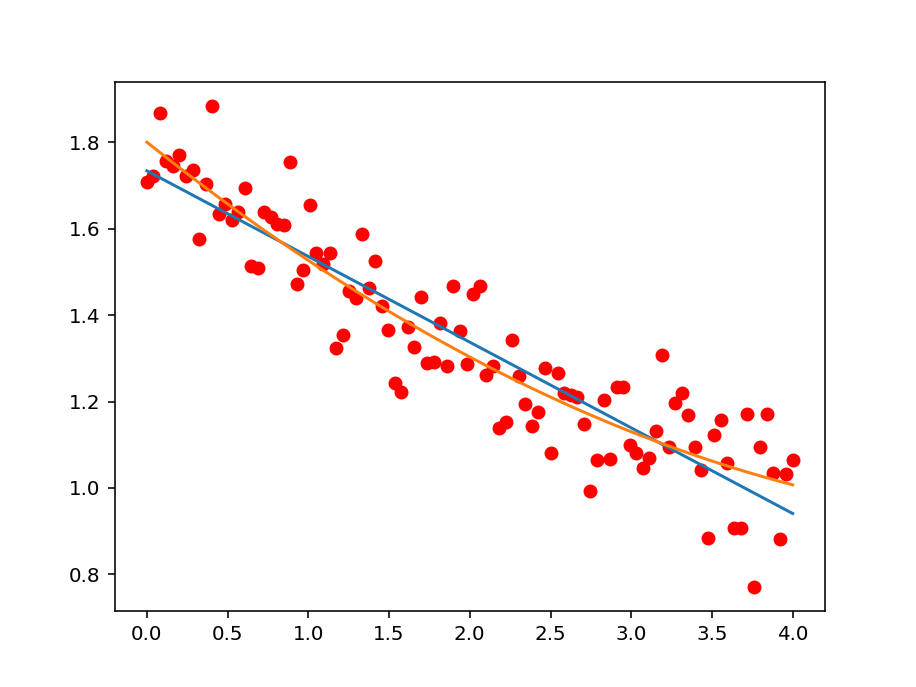

In [200]:
import matplotlib.pylab as mpl
mpl.plot(x, noisy_y, 'ro')
mpl.plot(x, linear_y)
mpl.plot(x, quad_y)
#mpl.plot(x, y)

Standard diagnostic tools

* Eyeball the plotted solution against the objective

* Run several times and take the best result

* Analyze a log of intermediate results, per iteration

* Rare: look at the covariance matrix

* Issue: how can you really be sure you have the results you were looking for?

**EXERCISE:** Use any of the solvers we've seen thus far to find the minimum of the `zimmermann` function (i.e. use `mystic.models.zimmermann` as the objective).  Use the bounds suggested below, if your choice of solver allows it.

In [18]:
import mystic.models as models
print(models.zimmermann.__doc__)

evaluates a Zimmermann function for a list of coeffs

f(x) = max(f_0(x), p_i(x)), with i = 0,1,2,3

Where:
f_0(x) = 9 - x_0 - x_1
with for x_0 < 0:
p_0(x) = -100 * x_0
and for x_1 < 0:
p_1(x) = -100 * x_1
and for c_2(x) > 16 and c_3(x) > 14:
p_i(x) = 100 * c_i(x), with i = 2,3
c_2(x) = (x_0 - 3)^2 + (x_1 - 2)^2
c_3(x) = x_0 * x_1
Otherwise, p_i(x)=0 for i=0,1,2,3 and c_i(x)=0 for i=2,3.

Inspect with mystic_model_plotter using::
    mystic.models.zimmermann -b "-5:10:.1, -5:10:.1" -d -x 1

The minimum is f(x)=0.0 at x=(7.0,2.0)


**EXERCISE:** Do the same for the `fosc3d` function found at `mystic.models.fosc3d`, using the bounds suggested by the documentation, if your chosen solver accepts bounds or constraints.

More to ponder: what about high-dimenstional and nonlinear constraints?

Let's look at optimization "redesigned" in [mystic](mystic.ipynb)...